In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('..'))

from src.models.reshape import DataTransformer
from src.visualization.visualize import seaborn_style
from src.visualization.colors import purples

seaborn_style(purples["0"])

In [2]:
transformer = DataTransformer()
listen_history = transformer.get_data()
listen_history.head()

,title,subtitles,time,artist,date,month
0,Faded (Acoustic Version),"[{'name': 'Sara Farell - Topic', 'url': 'https...",2025-04-07 22:11:13.451000+00:00,Sara Farell,2025-04-07,2025-04-01
1,Daylight,"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2025-04-07 22:06:19.931000+00:00,Taylor Swift,2025-04-07,2025-04-01
2,One More Pull,"[{'name': 'The Wellermen - Topic', 'url': 'htt...",2025-04-07 22:06:16.322000+00:00,The Wellermen,2025-04-07,2025-04-01
3,omplex (demo),"[{'name': 'Katie Gregson-MacLeod - Topic', 'ur...",2025-04-07 22:01:59.785000+00:00,Katie Gregson-MacLeod,2025-04-07,2025-04-01
4,Little Swing,[{'name': 'AronChupa & Little Sis Nora - Topic...,2025-04-07 21:57:28.153000+00:00,AronChupa & Little Sis Nora,2025-04-07,2025-04-01


In [3]:
artist = 'Taylor Swift'

def track_share_by_month():
    category = 'title'
    grouped_data = (
        listen_history
            .query(f'artist == "{artist}"')
            .groupby(['month', category])
            .size()
            .reset_index(name='count')
    )

    grouped_data['percentage'] = grouped_data['count'] / grouped_data.groupby('month')['count'].transform('sum') * 100
    track_share_by_month = (
        grouped_data[['month', category, 'percentage']]
        .groupby(['month', category])
        .sum()
        .reset_index()
        .pivot(index='month', columns=category, values='percentage')
        .fillna(0)
        .reset_index()
    )
    track_share_by_month.set_index('month', inplace=True)
    return track_share_by_month

track_share_by_month().tail()

title,"""Slut!"" (Taylor's Version) (From The Vault)",... Ready For It?,1,22,Afterglow,All Of The Girls You Loved Before,All Too Well (10 Minute Version) (Taylor's Version) (From The Vault),All Too Well (Taylor's Version),All You Had To Do Was Stay,All You Had To Do Was Stay (Taylor's Version),...,mpagne problems,my tears ricochet,onderland (Taylor's Version),"ould've, Could've, Should've",rdigan,rdigan (cabin in candlelight Version),right where you left me (bonus track),ugust,willow,xile
month,,,,,,,,,,,,,,,,,,,,,
2024-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2025-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
top_five_tracks = (
    listen_history
    .query(f'artist == "{artist}"')[['title', 'month']]
    .groupby('title')
    .size()
    .reset_index(name='count')
    .sort_values("count", ascending=False)
    .head(5)['title']
    .tolist()
)
top_five_tracks

["Treacherous (Taylor's Version)",
 'Enchanted',
 'You Belong With Me (Taylor’s Version)',
 'The Way I Loved You (Taylor’s Version)',
 'Delicate']

In [5]:
def plot_for_track(df):
    grays = ['0.6', '0.7', '0.8', '0.9']
    colors = [purples['1'], purples['3'], purples['5'], purples['7'], purples['9']] + grays * math.ceil((len(df.columns) - 4)/len(grays))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.stackplot(df.index, df.T, labels=df.columns, alpha=0.7, colors=colors, linewidth=0)

    ax.set_title(f'{artist}: Ratio Of Track Listens Each Month (5 Most Listened Overall vs. Other Tracks)')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Month')
    ordered_legend = top_five_tracks
    ordered_legend.reverse()
    ax.legend(ordered_legend + ['Other'], loc="upper left", bbox_to_anchor=(1,1))
    ax.margins(x=0, y=0)

    plt.show()
    fig.savefig(f"../reports/figures/tracks/ratio_of_{artist.lower().replace(' ', '_')}_track_listens.png", bbox_inches='tight')

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_63716/565151340.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.insert(0, col.name, col)
/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_63716/565151340.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.insert(0, col.name, col)
/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_63716/565151340.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

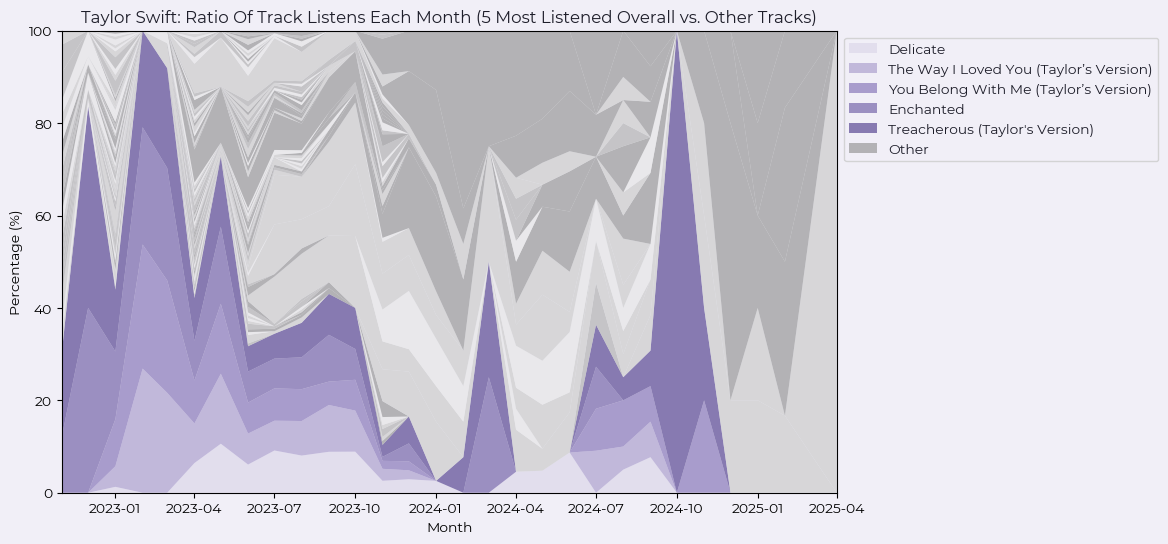

In [6]:
data = track_share_by_month()
for track in top_five_tracks:
    col = data.pop(track)
    data.insert(0, col.name, col)
    
plot_for_track(data)